In [29]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [30]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import datetime as dt
import datetime, pytz
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from matplotlib import pyplot
import yfinance
import investpy
from stockstats import StockDataFrame

import matplotlib.dates as mpl_dates
from mpl_finance import candlestick_ohlc
from scipy.stats import skew, norm
from scipy.signal import argrelextrema
import copy
from sklearn.cluster import KMeans 
import time
from sklearn.cluster import MiniBatchKMeans
from sklearn.model_selection import train_test_split

pd.set_option("display.max_rows",2000)
pd.set_option("display.max_columns",50)

In [62]:
df = pd.read_csv("predictive_maintenance.csv") 

In [32]:
df

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0         1     M14860    M                298.1                    308.6   
1         2     L47181    L                298.2                    308.7   
2         3     L47182    L                298.1                    308.5   
3         4     L47183    L                298.2                    308.6   
4         5     L47184    L                298.2                    308.7   
...     ...        ...  ...                  ...                      ...   
9995   9996     M24855    M                298.8                    308.4   
9996   9997     H39410    H                298.9                    308.4   
9997   9998     M24857    M                299.0                    308.6   
9998   9999     H39412    H                299.0                    308.7   
9999  10000     M24859    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
0                       1551         42.8                0       0   
1                       1408         46.3                3       0   
2                       1498         49.4                5       0   
3                       1433         39.5                7       0   
4                       1408         40.0                9       0   
...                      ...          ...              ...     ...   
9995                    1604         29.5               14       0   
9996                    1632         31.8               17       0   
9997                    1645         33.4               22       0   
9998                    1408         48.5               25       0   
9999                    1500         40.2               30       0   

     Failure Type  
0      No Failure  
1      No Failure  
2      No Failure  
3      No Failure  
4      No Failure  
...           ...  
9995   No Failure  
9996   No Failure  
9997   No Failure  
9998   No Failure  
9999   No Failure  

[10000 rows x 10 columns]

In [33]:
#df.drop(["UDI"],axis=1,inplace=True)
#df.drop(["Product ID"],axis=1,inplace=True)

In [34]:
#df.drop(["Target"],axis=1,inplace=True)
#df.drop(["Failure Type"],axis=1,inplace=True)

In [80]:
df = df.drop(["UDI",'Product ID'],axis=1)

In [79]:
df['nf'] = df['Tool wear [min]'] * df['Torque [Nm]']

<AxesSubplot:xlabel='Target', ylabel='count'>

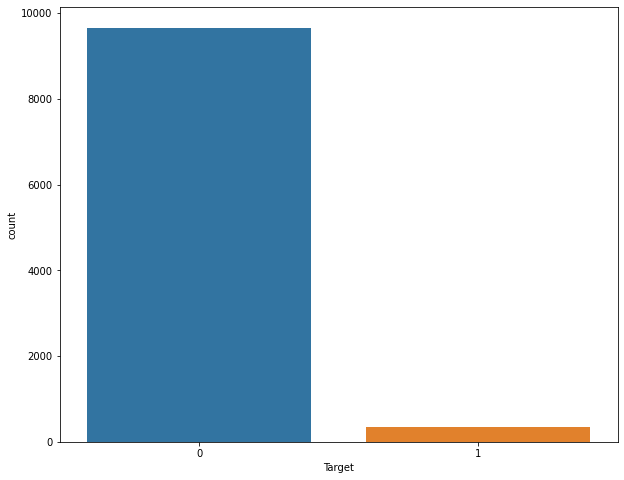

In [35]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,x="Target")

In [36]:
df

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0         1     M14860    M                298.1                    308.6   
1         2     L47181    L                298.2                    308.7   
2         3     L47182    L                298.1                    308.5   
3         4     L47183    L                298.2                    308.6   
4         5     L47184    L                298.2                    308.7   
...     ...        ...  ...                  ...                      ...   
9995   9996     M24855    M                298.8                    308.4   
9996   9997     H39410    H                298.9                    308.4   
9997   9998     M24857    M                299.0                    308.6   
9998   9999     H39412    H                299.0                    308.7   
9999  10000     M24859    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
0                       1551         42.8                0       0   
1                       1408         46.3                3       0   
2                       1498         49.4                5       0   
3                       1433         39.5                7       0   
4                       1408         40.0                9       0   
...                      ...          ...              ...     ...   
9995                    1604         29.5               14       0   
9996                    1632         31.8               17       0   
9997                    1645         33.4               22       0   
9998                    1408         48.5               25       0   
9999                    1500         40.2               30       0   

     Failure Type  
0      No Failure  
1      No Failure  
2      No Failure  
3      No Failure  
4      No Failure  
...           ...  
9995   No Failure  
9996   No Failure  
9997   No Failure  
9998   No Failure  
9999   No Failure  

[10000 rows x 10 columns]

<AxesSubplot:xlabel='Failure Type', ylabel='count'>

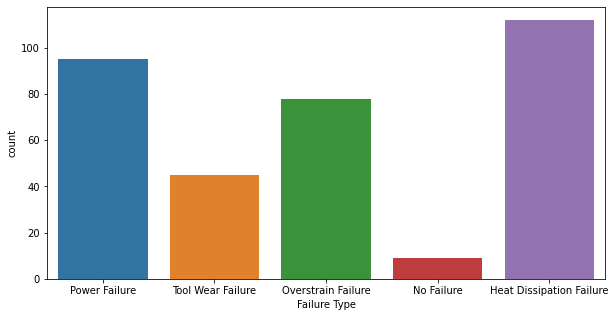

In [37]:
plt.figure(figsize=(10,5))
sns.countplot(data=df[df['Target']==1],x="Failure Type")


In [41]:
(df[df.Target == 1])

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
50      51     L47230    L                298.9                    309.1   
69      70     L47249    L                298.9                    309.0   
77      78     L47257    L                298.8                    308.9   
160    161     L47340    L                298.4                    308.2   
161    162     L47341    L                298.3                    308.1   
168    169     L47348    L                298.4                    308.3   
194    195     M15054    M                298.2                    308.5   
207    208     M15067    M                298.4                    308.7   
242    243     L47422    L                298.0                    308.2   
248    249     L47428    L                298.0                    308.3   
249    250     L47429    L                298.0                    308.3   
259    260     M15119    M                298.1                    308.2   
327    328     L47507    L                297.7                    308.5   
380    381     L47560    L                297.5                    308.3   
442    443     L47622    L                297.4                    308.5   
463    464     L47643    L                297.4                    308.7   
586    587     L47766    L                297.6                    309.6   
603    604     L47783    L                297.9                    309.8   
746    747     L47926    L                296.8                    308.1   
847    848     L48027    L                296.4                    307.4   
880    881     M15740    M                295.8                    306.3   
903    904     L48083    L                295.7                    306.2   
926    927     L48106    L                295.6                    306.1   
1016  1017     M15876    M                296.3                    307.2   
1085  1086     L48265    L                297.0                    307.8   
1087  1088     H30501    H                296.9                    307.8   
1095  1096     L48275    L                296.9                    307.5   
1123  1124     H30537    H                296.6                    307.7   
1124  1125     M15984    M                296.7                    307.8   
1144  1145     L48324    L                297.0                    307.9   
1161  1162     L48341    L                297.0                    307.8   
1162  1163     L48342    L                296.9                    307.8   
1167  1168     L48347    L                297.0                    308.1   
1284  1285     L48464    L                298.4                    309.5   
1324  1325     M16184    M                298.8                    310.1   
1334  1335     L48514    L                299.0                    310.4   
1335  1336     L48515    L                299.0                    310.4   
1391  1392     L48571    L                298.9                    310.2   
1419  1420     L48599    L                298.7                    309.8   
1437  1438     H30851    H                298.8                    309.9   
1492  1493     M16352    M                298.0                    308.7   
1496  1497     L48676    L                298.0                    308.7   
1509  1510     L48689    L                298.0                    308.5   
1583  1584     L48763    L                298.2                    308.4   
1595  1596     L48775    L                298.0                    308.2   
1682  1683     H31096    H                297.9                    307.4   
1763  1764     L48943    L                298.2                    307.6   
1784  1785     L48964    L                298.3                    308.0   
1789  1790     L48969    L                298.2                    307.9   
1808  1809     L48988    L                298.1                    307.7   
1833  1834     L49013    L                297.8                    307.3   
1996  1997     M16856    M                298.4        

In [42]:
print(df.isnull().sum())

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64


In [43]:
len(df[df.Target == 1])

339

In [44]:
df.groupby(['Target','Failure Type']).count().drop(['Process temperature [K]',
                                                      'Rotational speed [rpm]',
                                                     'Torque [Nm]',
                                                     'Tool wear [min]',
                                                      'Air temperature [K]'],axis=1).rename(columns = {'Type':'count'})


UDI  Product ID  count
Target Failure Type                                     
0      No Failure                9643        9643   9643
       Random Failures             18          18     18
1      Heat Dissipation Failure   112         112    112
       No Failure                   9           9      9
       Overstrain Failure          78          78     78
       Power Failure               95          95     95
       Tool Wear Failure           45          45     45

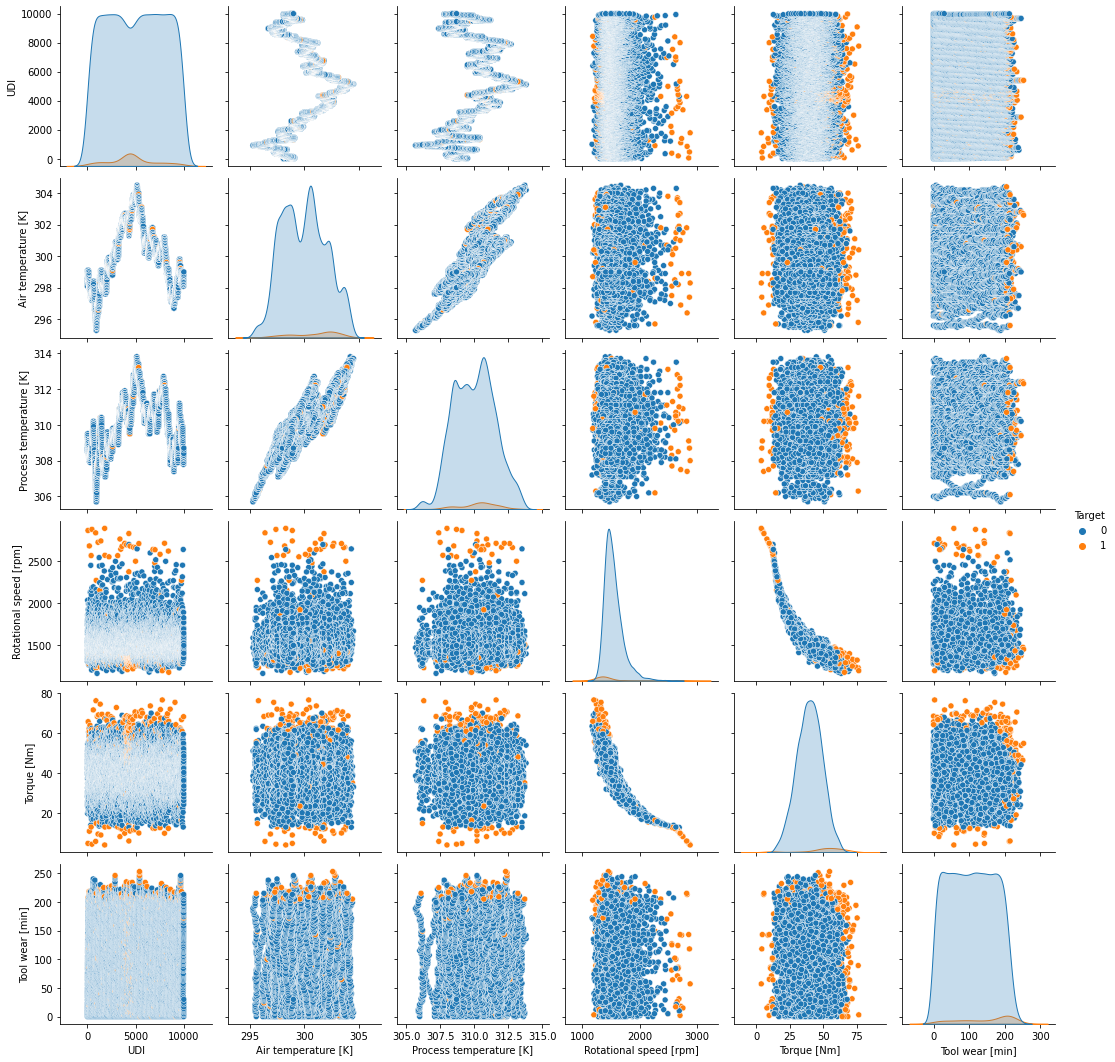

In [45]:
sns.pairplot(df,hue='Target')


<AxesSubplot:>

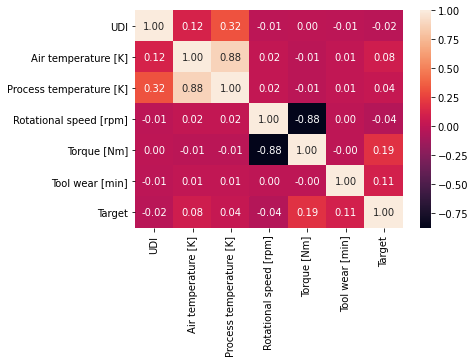

In [46]:
sns.heatmap(df.corr(), annot=True, fmt=".2f")


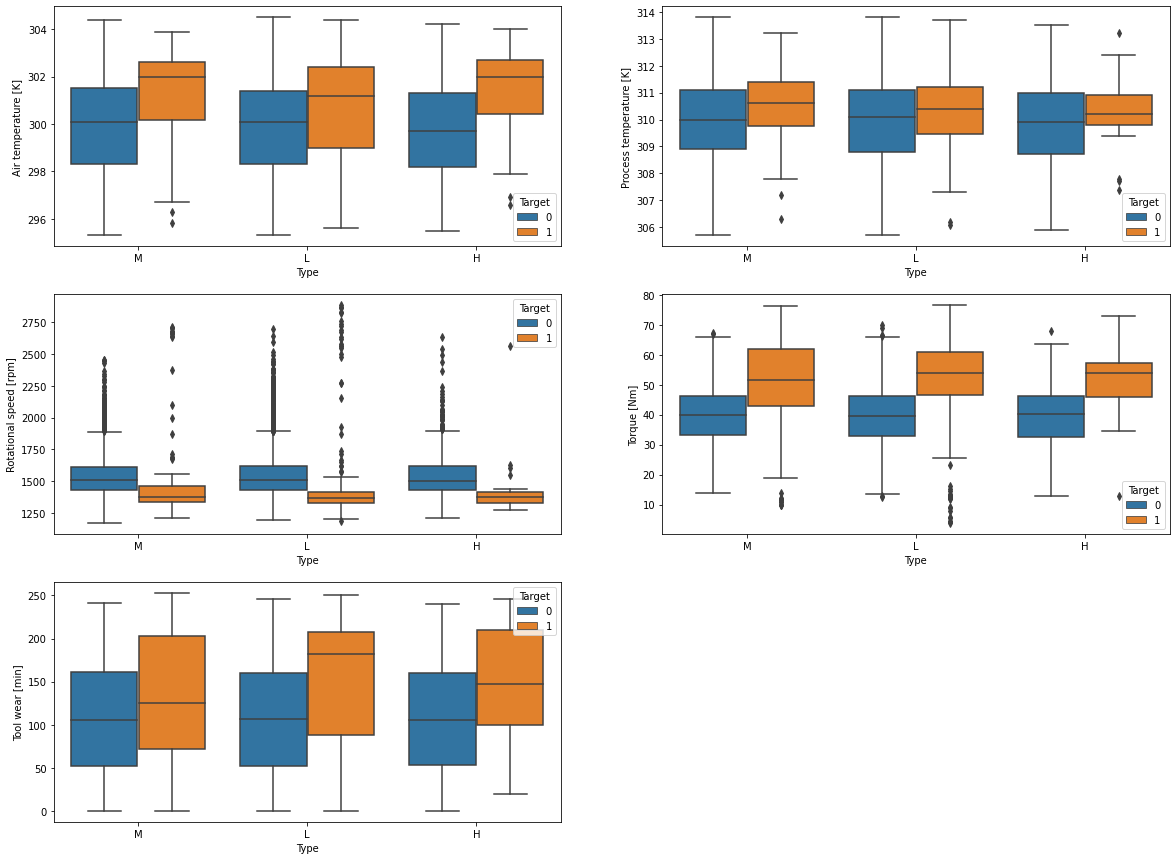

In [47]:
plt.figure(figsize = (20,15))
m=1
for i in ['Air temperature [K]', 'Process temperature [K]','Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'] :
    plt.subplot(3,2,m)
    sns.boxplot(data=df,y=i,x="Type",hue="Target")
    m+=1

In [48]:
df["Target"].value_counts()

0    9661
1     339
Name: Target, dtype: int64

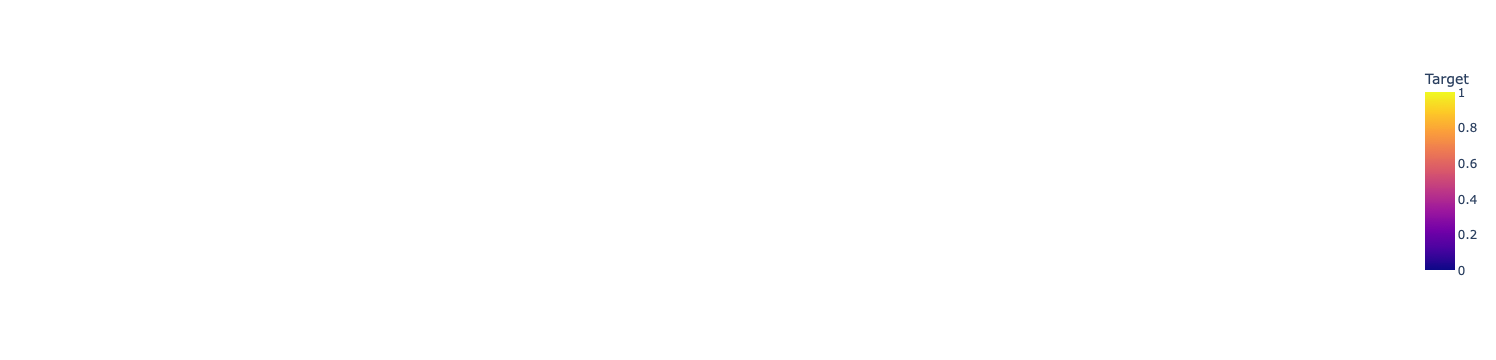

In [49]:
import plotly.express as px

fig = px.scatter_3d(df, x='Tool wear [min]', y='Torque [Nm]', z='Rotational speed [rpm]',
              color='Target')
fig.show()

In [66]:
df.head()

UDI Product ID  Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860     1                298.1                    308.6   
1    2     L47181     0                298.2                    308.7   
2    3     L47182     0                298.1                    308.5   
3    4     L47183     0                298.2                    308.6   
4    5     L47184     0                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target Failure Type  
0                    1551         42.8                0       0   No Failure  
1                    1408         46.3                3       0   No Failure  
2                    1498         49.4                5       0   No Failure  
3                    1433         39.5                7       0   No Failure  
4                    1408         40.0                9       0   No Failure

In [63]:
df["Type"] = df["Type"].replace("L",0)
df["Type"] = df["Type"].replace("M",1)
df["Type"] = df["Type"].replace("H",2)

In [64]:
df_target = df.Target.copy()
df_failure_type = df["Failure Type"].copy()

In [83]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Failure Type','Target'],axis=1),
                                                    df['Target'], test_size=0.3, random_state=42)

In [73]:
import time
from sklearn.metrics import accuracy_score,classification_report
classifier=[]
imported_as=[]
#LGBM
import lightgbm as lgb
lgbm = lgb.LGBMClassifier()
classifier.append('LightGBM')
imported_as.append('lgbm')
#MultiLayerPerceptron
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier()
classifier.append('Multi Layer Perceptron')
imported_as.append('mlp')
#Bagging
from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier()
classifier.append('Bagging')
imported_as.append('bc')
#GBC
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
classifier.append('Gradient Boosting')
imported_as.append('gbc')
#ADA
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
classifier.append('Ada Boost')
imported_as.append('ada')
#XGB
import xgboost as xgb
from xgboost import XGBClassifier
xgb = XGBClassifier() 
classifier.append('XG Boost')
imported_as.append('xgb')
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
classifier.append('Logistic Regression')
imported_as.append('lr')
#RFC
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
classifier.append('Random Forest')
imported_as.append('rfc')
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
classifier.append('k Nearest Neighbours')
imported_as.append('knn')
#SVM
from sklearn.svm import SVC
svc = SVC()
classifier.append('Support Vector Machine')
imported_as.append('svc')
#Grid
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100, 1000,2000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
classifier.append('SVM tuning grid')
imported_as.append('grid')
#STcaking
from sklearn.ensemble import StackingClassifier
estimators=[('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
            ('svr',SVC(random_state=42))]
stc = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
classifier.append('Stacked (RFR & SVM)')
imported_as.append('stc')
classifiers = pd.DataFrame({'Classifier':classifier,'Imported as':imported_as})
print('All Models Imported\nModels stored in dataframe called classifiers')

All Models Imported
Models stored in dataframe called classifiers


In [74]:
class Modelling:
    def __init__(self, X_train, Y_train, X_test, Y_test, models):
        self.X_train = X_train
        self.X_test = X_test
        self.Y_train = Y_train
        self.Y_test = Y_test
        self.models = models
    
    def fit(self):
        model_acc = []
        model_time= []
        for i in self.models:
            start=time.time()
            if i == 'knn':
                accuracy = []
                for j in range(1,200):    
                    kn = KNeighborsClassifier(n_neighbors=j)
                    kn.fit(self.X_train,self.Y_train)
                    predK = kn.predict(self.X_test)
                    accuracy.append([accuracy_score(self.Y_test,predK),j])
                temp = accuracy[0]
                for m in accuracy:
                    if temp[0] < m[0]:
                        temp=m
                i = KNeighborsClassifier(n_neighbors=temp[1])
            i.fit(self.X_train,self.Y_train)
            model_acc.append(accuracy_score(self.Y_test,i.predict(self.X_test)))
            stop=time.time()
            model_time.append((stop-start))
            print(i,'has been fit')
        self.models_output = pd.DataFrame({'Models':self.models,'Accuracy':model_acc,'Runtime (s)':model_time})
        
    def results(self):
        models=self.models_output
        models = models.sort_values(by=['Accuracy','Runtime (s)'],ascending=[False,True]).reset_index().drop('index',axis=1)
        self.best = models['Models'][0]
        models['Models']=models['Models'].astype(str).str.split("(", n = 2, expand = True)[0]
        models['Accuracy']=models['Accuracy'].round(5)*100
        self.models_output_cleaned=models
        return(models)
        
    def best_model(self,type):
        if type=='model':
            return(self.best)
        elif type=='name':
            return(self.models_output_cleaned['Models'][0])
    
    def best_model_accuracy(self):
        return(self.models_output_cleaned['Accuracy'][0])
    
    def best_model_runtime(self):
        return(round(self.models_output_cleaned['Runtime (s)'][0],3))
    
    def best_model_predict(self,X_test):
        return(self.best.predict(X_test))
    
    def best_model_clmatrix(self):
        return(classification_report(self.Y_test,self.best.predict(self.X_test)))

In [75]:
display(classifiers)

Classifier Imported as
0                 LightGBM        lgbm
1   Multi Layer Perceptron         mlp
2                  Bagging          bc
3        Gradient Boosting         gbc
4                Ada Boost         ada
5                 XG Boost         xgb
6      Logistic Regression          lr
7            Random Forest         rfc
8     k Nearest Neighbours         knn
9   Support Vector Machine         svc
10         SVM tuning grid        grid
11     Stacked (RFR & SVM)         stc

In [76]:
models_to_test = [bc,gbc,ada,rfc,mlp,lr,knn,stc]

In [82]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 9069 to 7270
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      7000 non-null   int64  
 1   Product ID               7000 non-null   object 
 2   Type                     7000 non-null   int64  
 3   Air temperature [K]      7000 non-null   float64
 4   Process temperature [K]  7000 non-null   float64
 5   Rotational speed [rpm]   7000 non-null   int64  
 6   Torque [Nm]              7000 non-null   float64
 7   Tool wear [min]          7000 non-null   int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 492.2+ KB


In [84]:
classification = Modelling(X_train,y_train,X_test,y_test,models_to_test)
classification.fit()

BaggingClassifier() has been fit
GradientBoostingClassifier() has been fit
AdaBoostClassifier() has been fit
RandomForestClassifier() has been fit
MLPClassifier() has been fit
LogisticRegression() has been fit
KNeighborsClassifier(n_neighbors=1) has been fit
StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(n_estimators=10,
                                                       random_state=42)),
                               ('svr', SVC(random_state=42))],
                   final_estimator=LogisticRegression()) has been fit


In [85]:
classification.results()

Models  Accuracy  Runtime (s)
0           BaggingClassifier    99.133     2.483880
1      RandomForestClassifier    98.833     0.810921
2  GradientBoostingClassifier    98.767     0.986392
3          StackingClassifier    98.633     1.347955
4          AdaBoostClassifier    97.667     0.320145
5          LogisticRegression    97.400     0.164693
6               MLPClassifier    96.633     1.077893
7        KNeighborsClassifier    96.067     0.147125